In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
53,738,272,243,6,692,689,782,2604,232,1297,1832,7,54,1273,10721.0
54,745,279,244,6,712,717,813,2672,236,1329,1907,7,54,1313,11034.0
55,762,279,246,6,737,724,834,2759,242,1374,1980,7,54,1349,11353.0
56,778,281,249,6,750,747,866,2864,259,1400,2014,7,54,1379,11654.0
57,793,283,250,6,768,757,889,2939,288,1436,2065,7,54,1392,11927.0
58,799,284,250,6,776,788,898,2985,297,1454,2089,7,54,1410,12097.0
59,818,284,250,6,778,794,931,3029,299,1492,2113,7,54,1411,12266.0
60,825,284,254,6,784,802,946,3070,307,1520,2149,7,54,1429,12437.0
61,846,285,254,6,792,809,957,3203,310,1541,2200,7,54,1445,12709.0
62,853,286,254,6,801,818,973,3277,313,1576,2241,7,54,1465,12924.0


In [6]:
current_day = df_cases.index[-1]
print("### Time Since Last Doubling ###")
for col in df_cases.columns:
    time_at_half = df_cases[df_cases[col] < (df_cases[col].iloc[-1]/2)].index[-1]
    time_since_doubling = current_day - time_at_half
    
    print(f'{col} : {time_since_doubling} days')

### Time Since Last Doubling ###
Ayrshire and Arran : 27 days
Borders : 36 days
Dumfries and Galloway : 38 days
Eileanan Siar (Western Isles) : 42 days
Fife : 28 days
Forth Valley : 26 days
Grampian : 20 days
Greater Glasgow and Clyde : 26 days
Highland : 30 days
Lanarkshire : 28 days
Lothian : 25 days
Orkney : 39 days
Shetland : 46 days
Tayside : 32 days
Scotland (Total) : 27 days


In [7]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
58,60295,12097,1571
59,61696,12266,1576
60,63311,12437,1620
61,65125,12709,1703
62,67097,12924,1762
63,69191,13149,1811
64,71092,13305,1847
65,72683,13486,1857
66,74063,13627,1862
67,75570,13763,1912


## National Statistics

### total number of cases over time

In [8]:
roll = 7

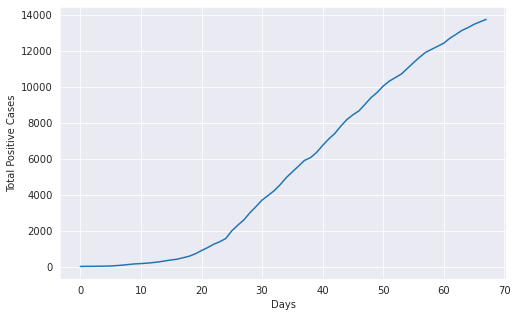

In [9]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

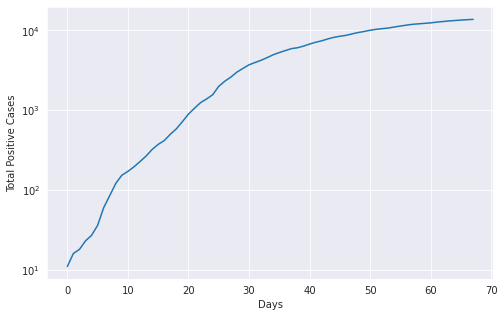

In [10]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

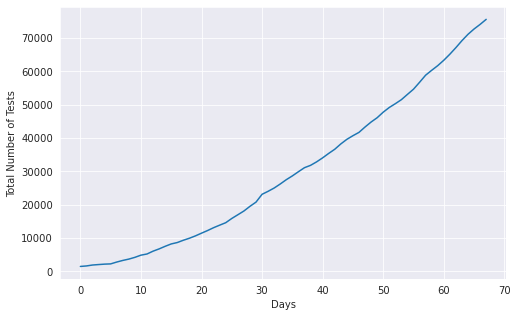

In [11]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [12]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

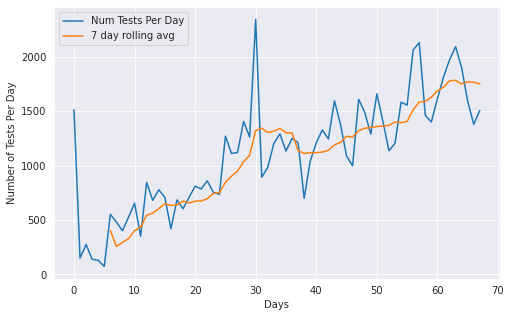

In [13]:
num_test_per_day.plot(figsize=(8, 5), label='Num Tests Per Day')
num_test_per_day.rolling(roll).mean().dropna().plot(label='7 day rolling avg')
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.legend()
plt.show()

### Total number of deaths over time

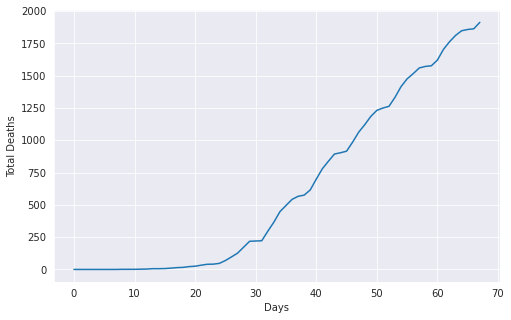

In [14]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

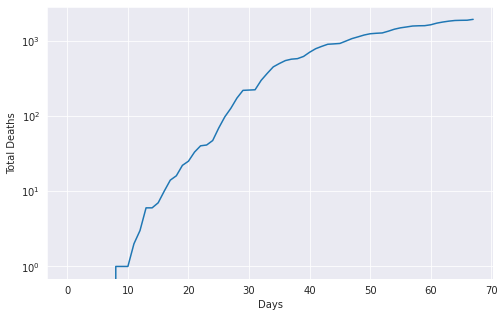

In [15]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

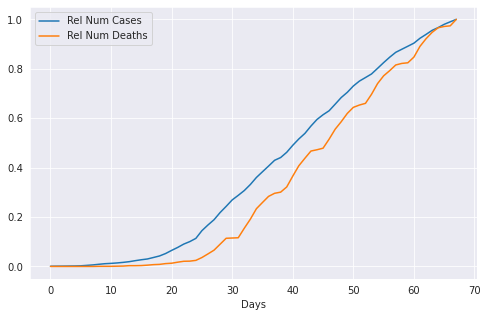

In [16]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

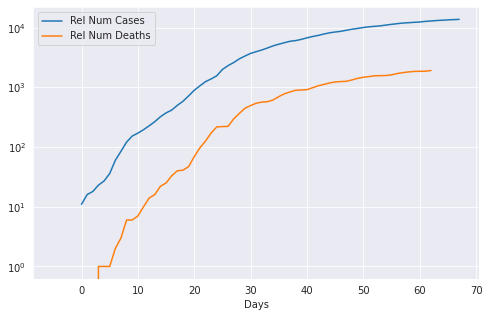

In [17]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day change in number of cases?

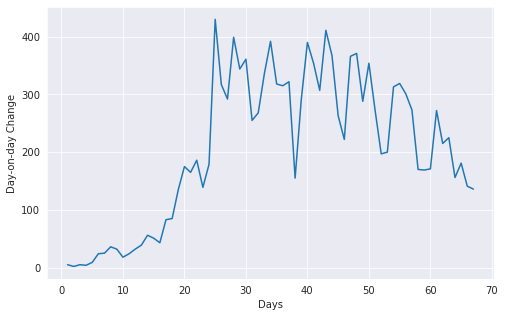

In [18]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Change')
plt.xlabel('Days')
plt.show()

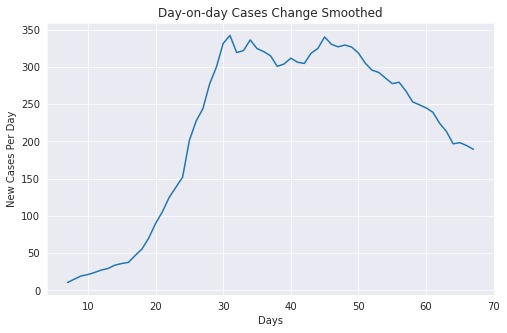

In [19]:
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(figsize=(8, 5))
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change Smoothed')
plt.show()

### What is the day-on-day percentage rise in cases?

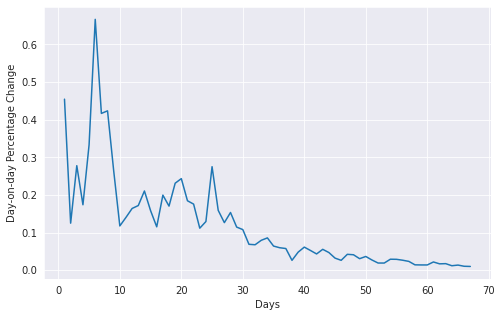

In [20]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

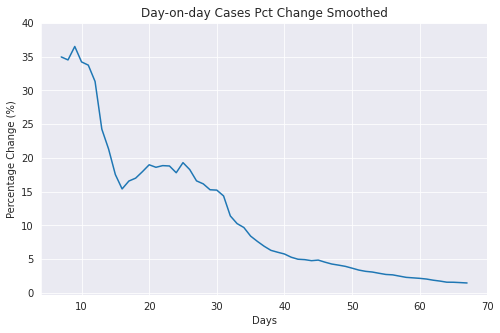

In [21]:
df_total['Total Positive Cases'].pct_change().rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [22]:
df_total['Total Positive Cases'].pct_change()[-7:]

61    0.021870
62    0.016917
63    0.017409
64    0.011864
65    0.013604
66    0.010455
67    0.009980
Name: Total Positive Cases, dtype: float64

In [23]:
df_total['Total Positive Cases'].pct_change().describe()

count    67.000000
mean      0.118496
std       0.125867
min       0.009980
25%       0.028036
50%       0.067660
75%       0.167222
max       0.666667
Name: Total Positive Cases, dtype: float64

In [24]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
58,0.007566,0.003534,0.000000,0.0,0.010417,0.040951,0.010124,0.015652,0.031250,0.012535,0.011622,0.0,0.0,0.012931,0.014253
59,0.023780,0.000000,0.000000,0.0,0.002577,0.007614,0.036748,0.014740,0.006734,0.026135,0.011489,0.0,0.0,0.000709,0.013970
60,0.008557,0.000000,0.016000,0.0,0.007712,0.010076,0.016112,0.013536,0.026756,0.018767,0.017037,0.0,0.0,0.012757,0.013941
61,0.025455,0.003521,0.000000,0.0,0.010204,0.008728,0.011628,0.043322,0.009772,0.013816,0.023732,0.0,0.0,0.011197,0.021870
62,0.008274,0.003509,0.000000,0.0,0.011364,0.011125,0.016719,0.023103,0.009677,0.022713,0.018636,0.0,0.0,0.013841,0.016917
63,0.037515,0.000000,0.003937,0.0,0.003745,0.012225,0.028777,0.017089,0.012780,0.032995,0.014726,0.0,0.0,0.004096,0.017409
64,0.011299,0.000000,0.000000,0.0,0.007463,0.000000,0.033966,0.010201,0.000000,0.004300,0.021988,0.0,0.0,0.010197,0.011864
65,0.010056,0.000000,0.000000,0.0,0.001235,0.000000,0.014493,0.024354,0.009464,0.015291,0.015060,0.0,0.0,0.007402,0.013604
66,0.008850,0.020979,0.000000,0.0,0.002466,0.013285,0.026667,0.008698,0.006250,0.019880,0.008902,0.0,0.0,0.000000,0.010455
67,0.014254,0.006849,0.000000,0.0,0.000000,0.020262,0.022263,0.008911,0.006211,0.012995,0.007143,0.0,0.0,0.005344,0.009980


In [25]:
df_cases.pct_change().rolling(roll).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
58,0.018060,0.013331,0.005860,0.0,0.020802,0.025276,0.026506,0.026913,0.041001,0.024089,0.022786,0.0,0.0,0.017278,0.022913
59,0.018215,0.007815,0.004075,0.0,0.019257,0.022480,0.027363,0.026022,0.040059,0.023877,0.022906,0.0,0.0,0.016237,0.022182
60,0.016069,0.006222,0.006360,0.0,0.018051,0.022028,0.027626,0.023835,0.041375,0.022944,0.023123,0.0,0.0,0.016700,0.021458
61,0.018351,0.003049,0.005773,0.0,0.015380,0.017470,0.023624,0.026294,0.040308,0.021393,0.020665,0.0,0.0,0.013811,0.020412
62,0.016273,0.003550,0.004602,0.0,0.011988,0.017664,0.022323,0.024943,0.038058,0.019800,0.017859,0.0,0.0,0.011871,0.018699
63,0.018632,0.002526,0.003422,0.0,0.010003,0.014872,0.020952,0.021947,0.029848,0.021811,0.017509,0.0,0.0,0.009280,0.017398
64,0.017492,0.001509,0.002848,0.0,0.007640,0.012960,0.022011,0.019663,0.013853,0.018751,0.017033,0.0,0.0,0.009390,0.015747
65,0.017848,0.001004,0.002848,0.0,0.006329,0.007110,0.022635,0.020907,0.010740,0.019145,0.017524,0.0,0.0,0.008600,0.015654
66,0.015715,0.004001,0.002848,0.0,0.006313,0.007920,0.021194,0.020043,0.010671,0.018251,0.017154,0.0,0.0,0.008499,0.015152
67,0.016529,0.004980,0.000562,0.0,0.005211,0.009375,0.022073,0.019383,0.007736,0.017427,0.015741,0.0,0.0,0.007440,0.014586


### What is the day-on-day percentage rise in deaths?

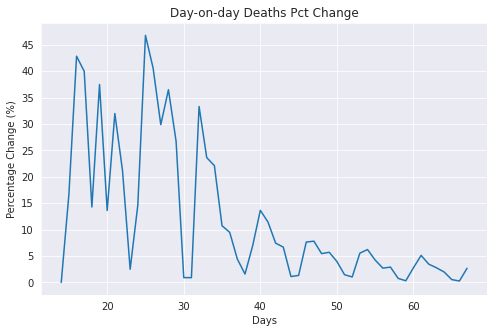

In [26]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

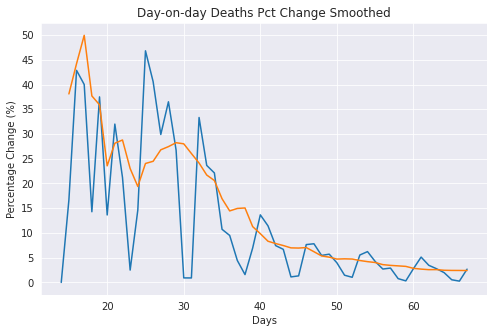

In [27]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.iloc[14:].mul(100).plot(figsize=(8,5))
death_pct_change.rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [28]:
death_pct_change[-10:]

58    0.007697
59    0.003183
60    0.027919
61    0.051235
62    0.034645
63    0.027809
64    0.019879
65    0.005414
66    0.002693
67    0.026853
Name: Total Deaths, dtype: float64

In [29]:
death_pct_change.describe()

count    60.000000
mean           inf
std            NaN
min       0.000000
25%       0.023720
50%       0.064609
75%       0.225105
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

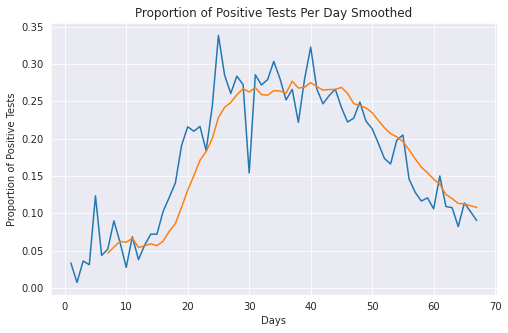

In [30]:
prop_pos = (df_total['Total Positive Cases'].diff() / df_total['Total Tests'].diff())

prop_pos.plot(figsize=(8, 5))
prop_pos.rolling(roll).mean().dropna().plot()
plt.title('Proportion of Positive Tests Per Day Smoothed')
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

### What is the Day-on-day rise in deaths?

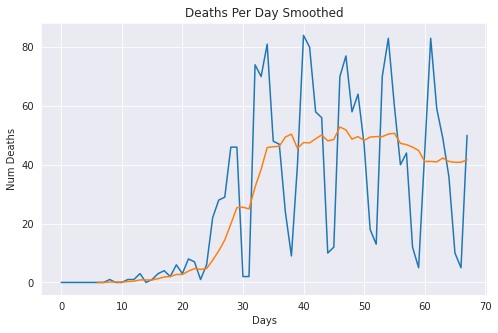

In [31]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.plot(figsize=(8, 5))
death_per_day.rolling(roll).mean().plot(figsize=(8, 5))
plt.title('Deaths Per Day Smoothed')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

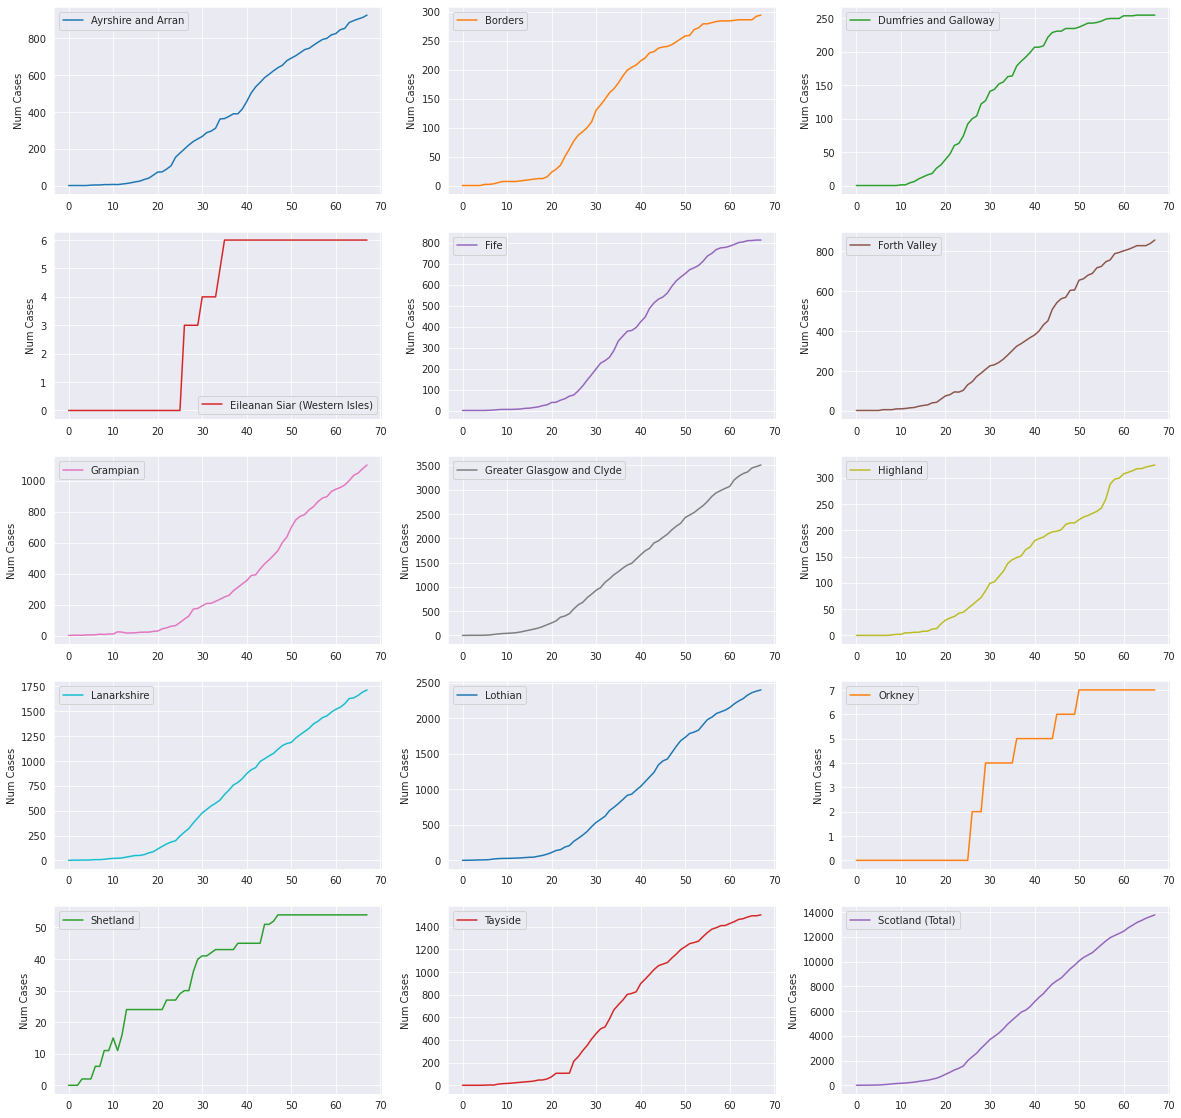

In [32]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

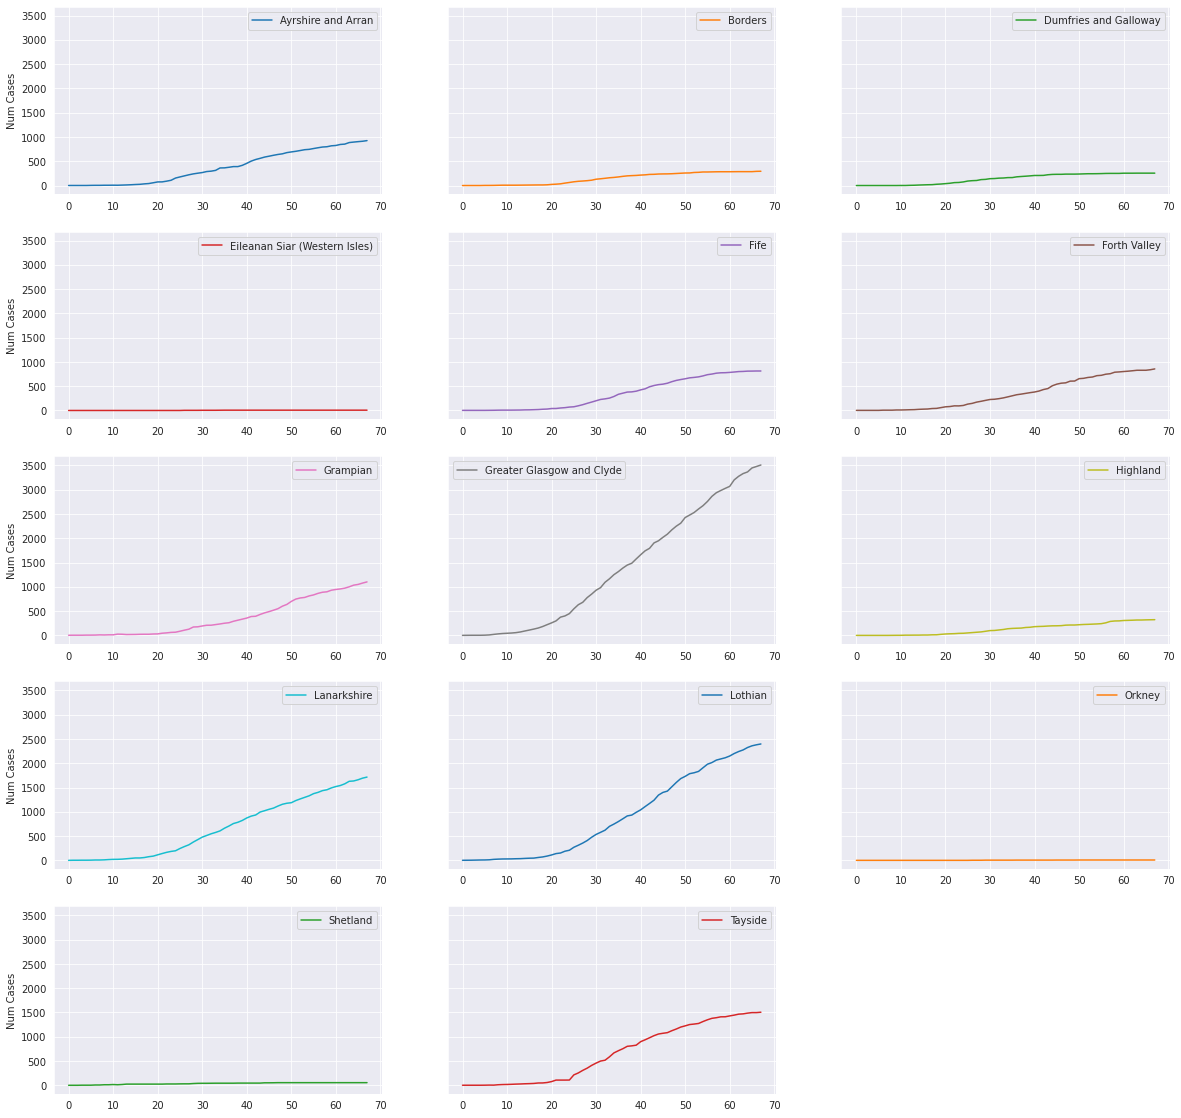

In [33]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [34]:
194 / 178

1.0898876404494382

In [35]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [36]:
df_cases_rel = df_cases / df_pop.values.T * 100000

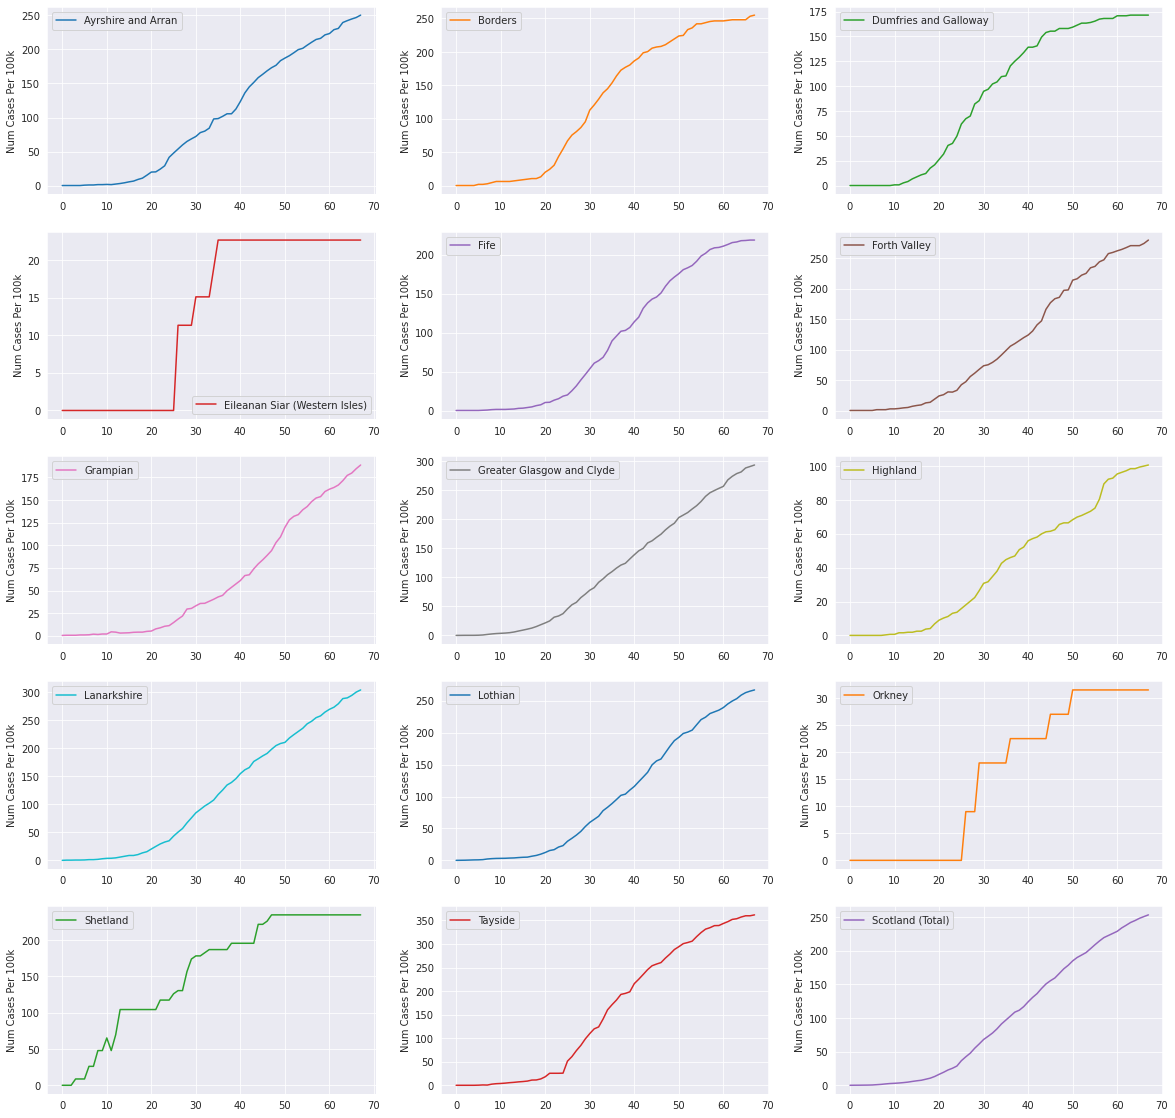

In [37]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

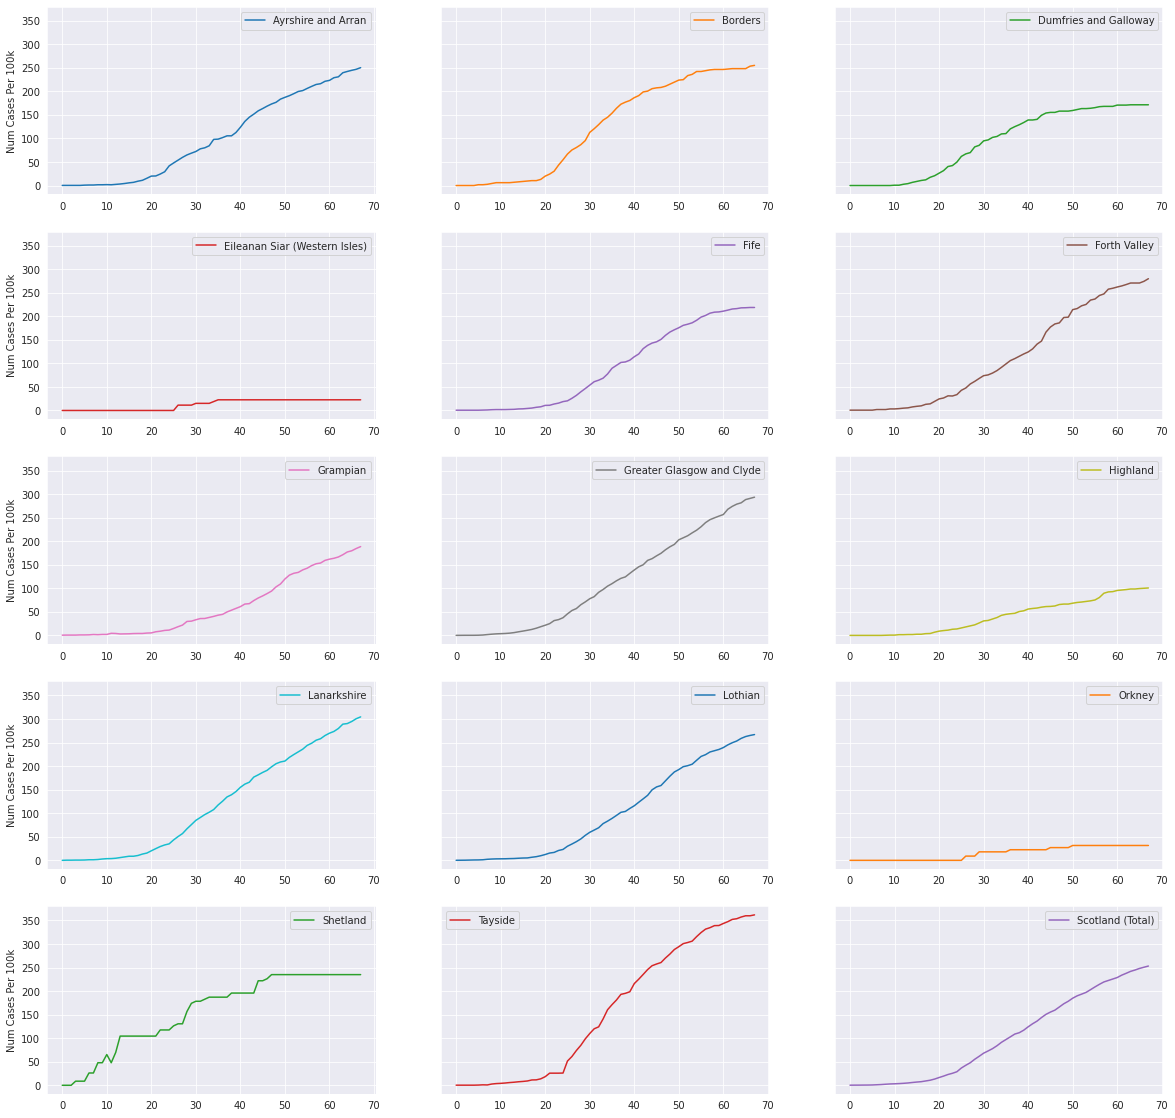

In [38]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

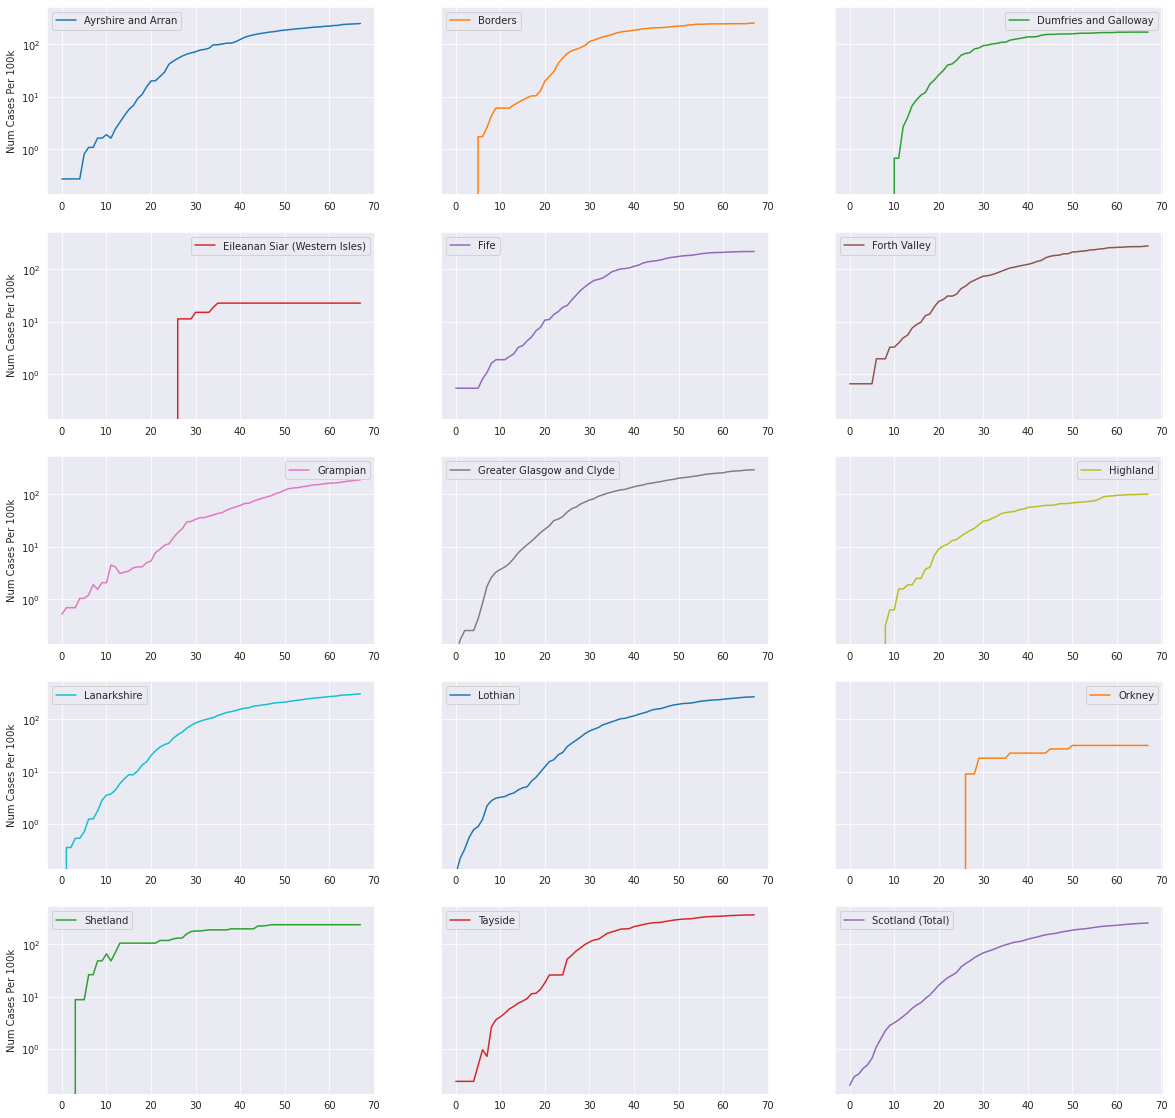

In [39]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

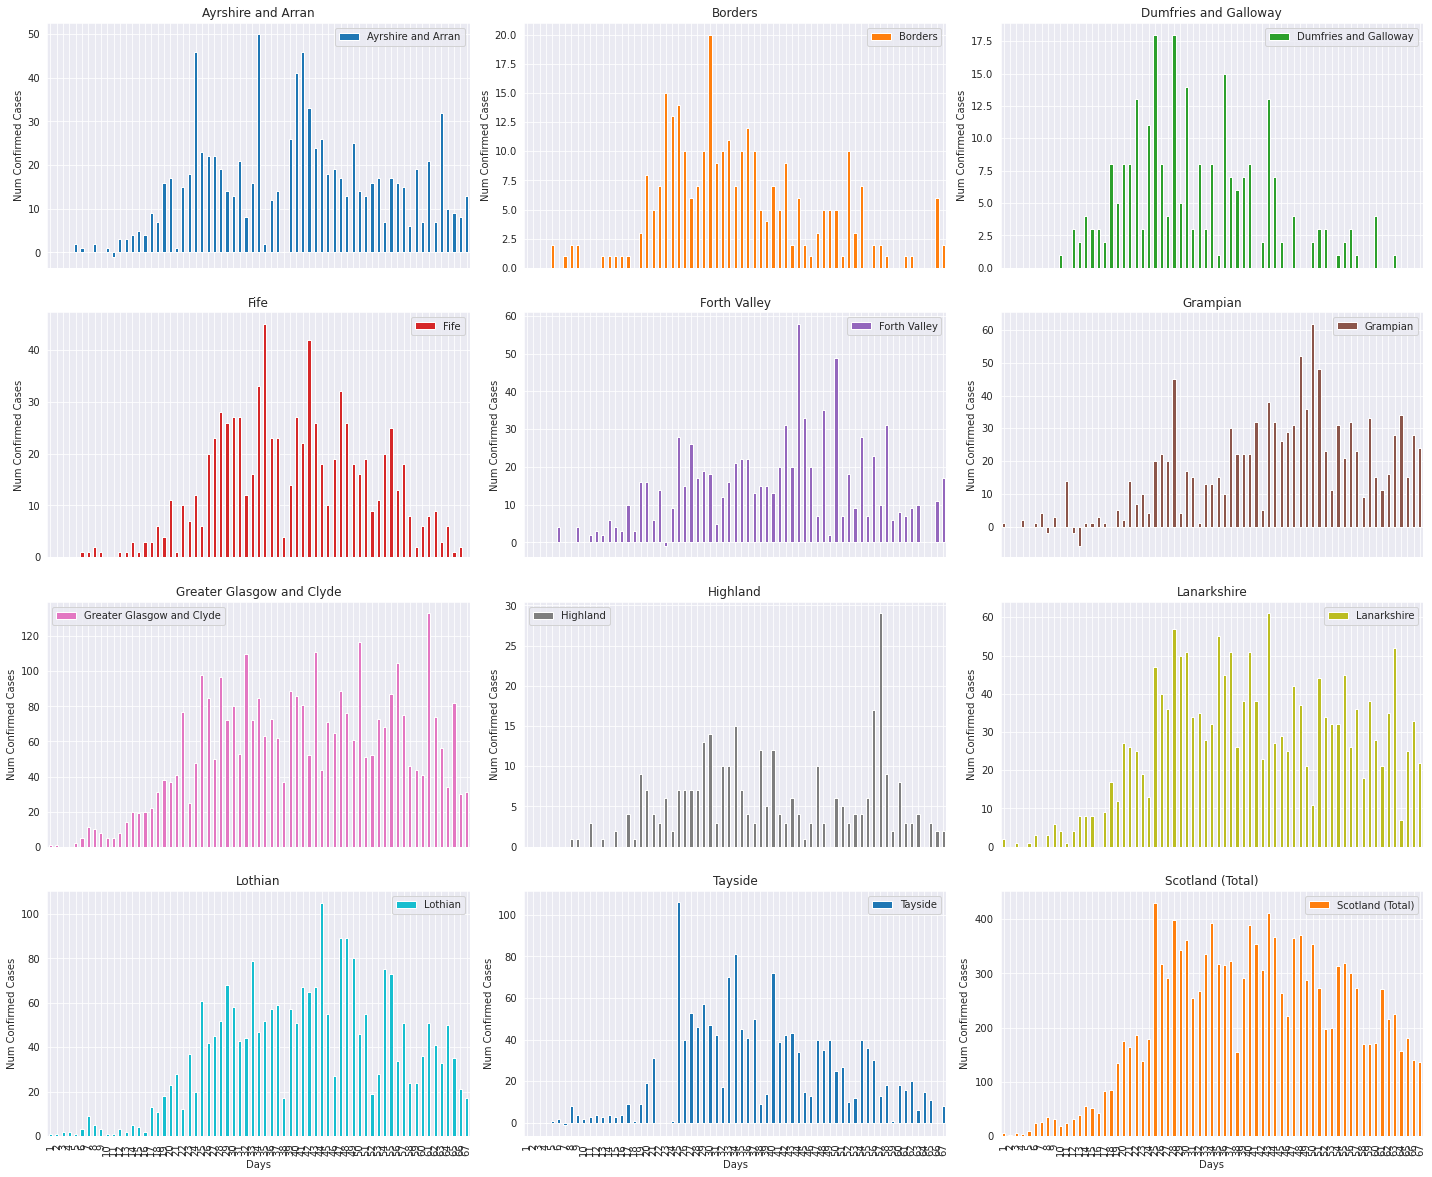

In [40]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

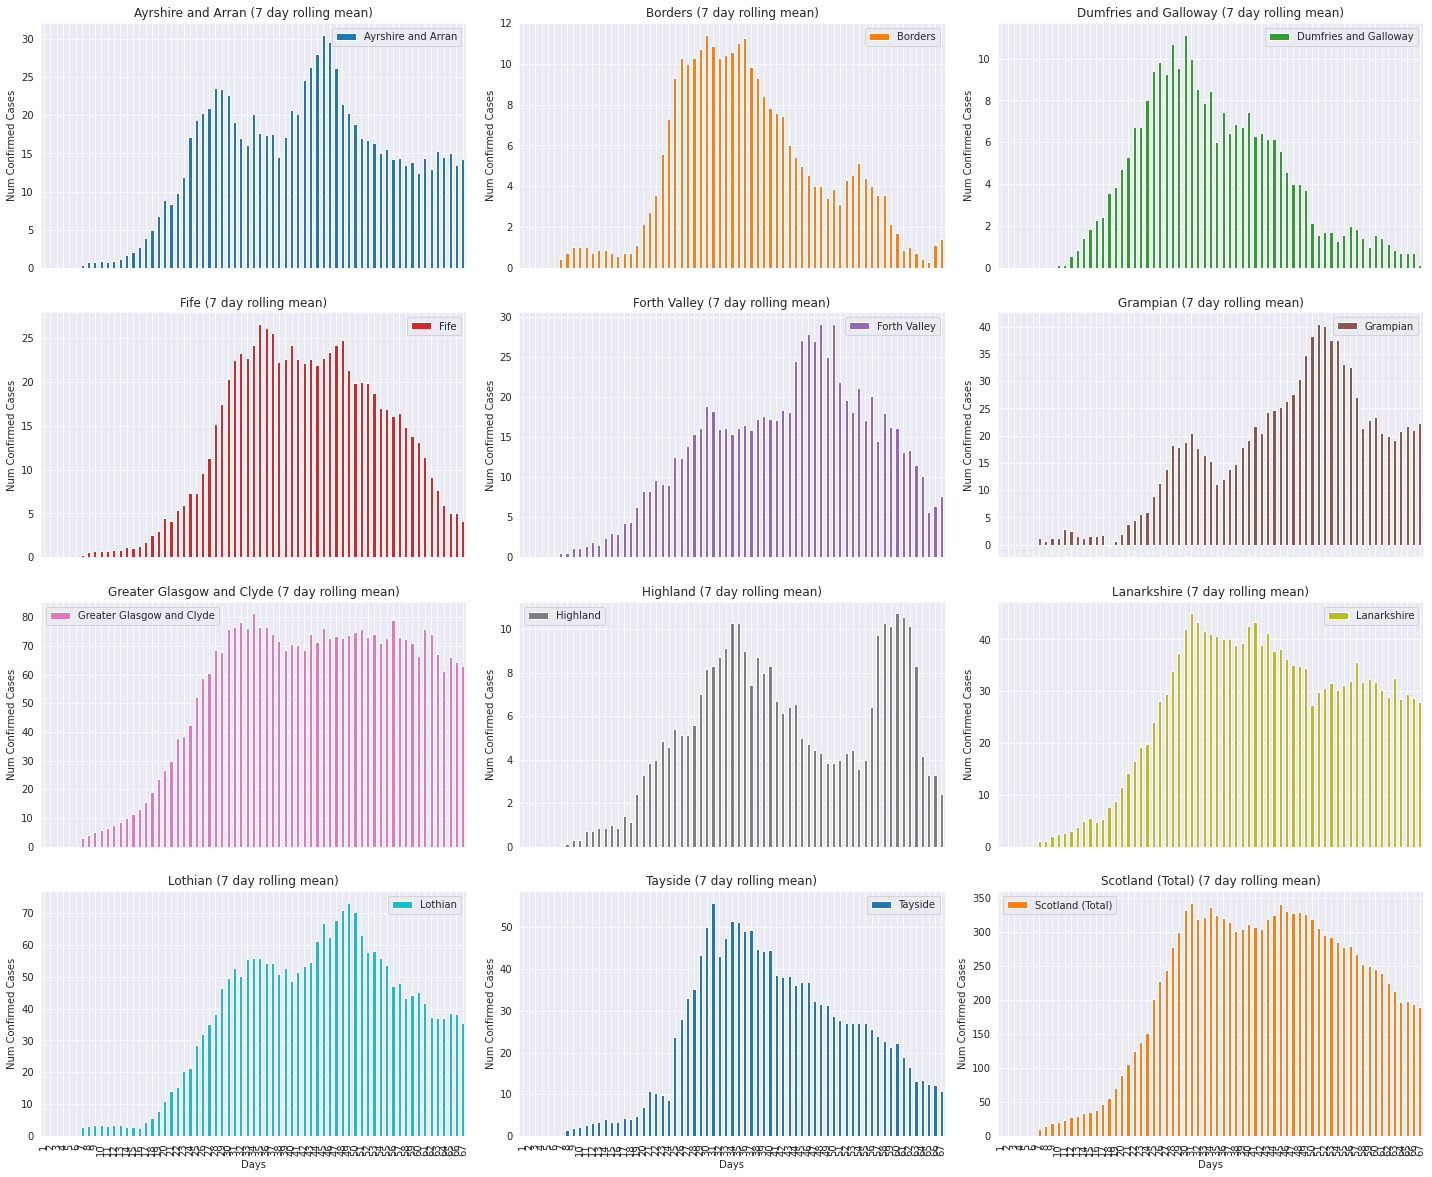

In [41]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(roll).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + f' ({roll} day rolling mean)')
plt.tight_layout()
plt.show()

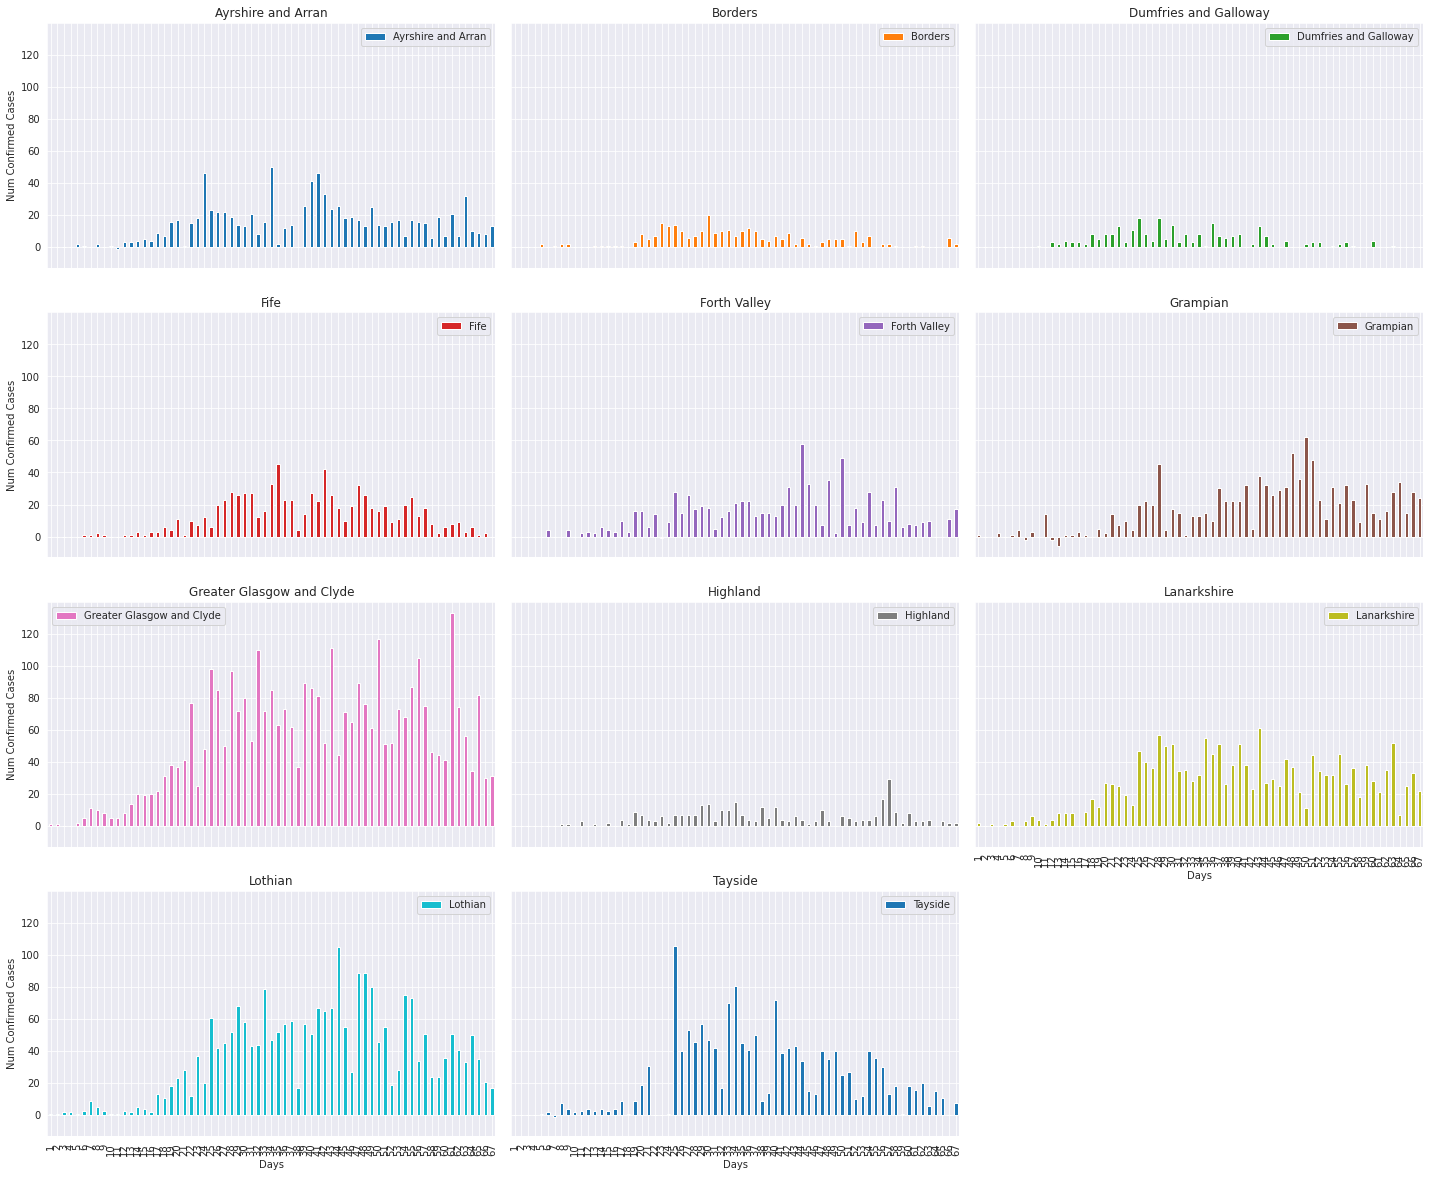

In [42]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [43]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

### Log Growth Curves for Each Region

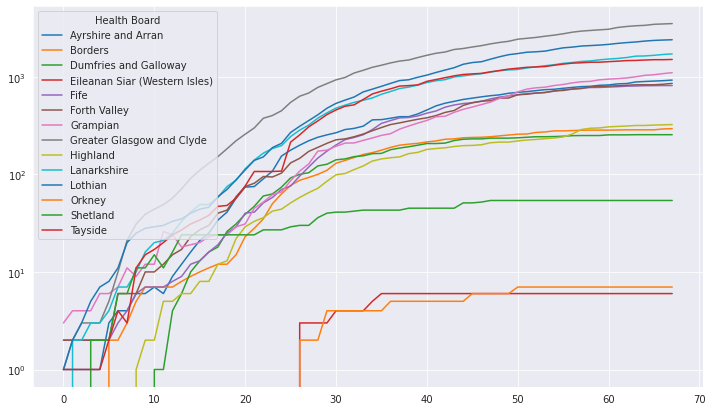

In [44]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

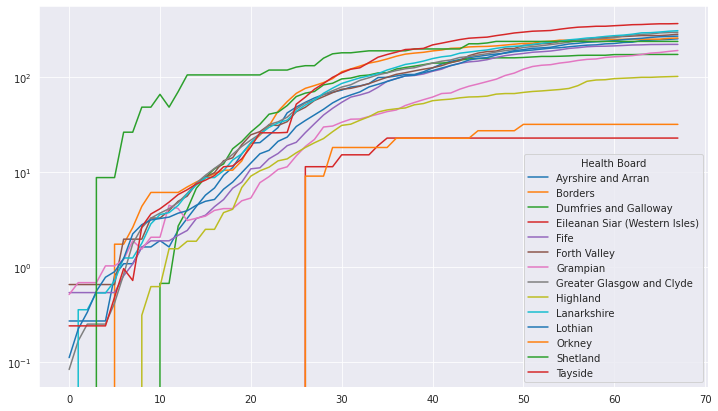

In [45]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()